# **Exploração e análise de dados de crédito com SQL**

Esse é o terceiro projeto do curso de análise de dados da EBAC

## Os dados: 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

Tabela criada utilizando o **AWS Athena** e o **S3 Bucket**

## **Exploração de dados:**

Entendendo e conhecendo os dados que serão explorados:

**Quantas linhas possui o dataset?**

Query: SELECT count(*) FROM credito

* 2564 linhas

**Quais são os tipos de dados?**

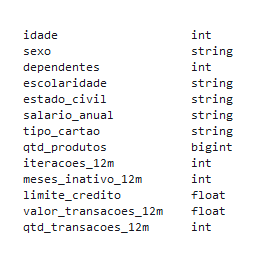

**Qual a faixa de idade dos clientes?**

**Query:**

    SELECT
        MIN(idade) as idade_min,
        MAX(idade) as idade_max,
        CAST(AVG(idade) AS int) AS
            media_idade,
    FROM credito;
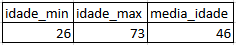 

* A média de idade dos clientes é de 46 anos, com a idade máxima em 73 anos e a mínima em 26.

**Qual a proporção do sexo dos clientes?**

**Query:**

    SELECT 
        sexo,
        COUNT(sexo) AS 
            clientes,
        ROUND(COUNT(sexo)/2564.00, 2) AS
            porcentagem
    FROM credito
    GROUP BY sexo;
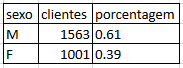

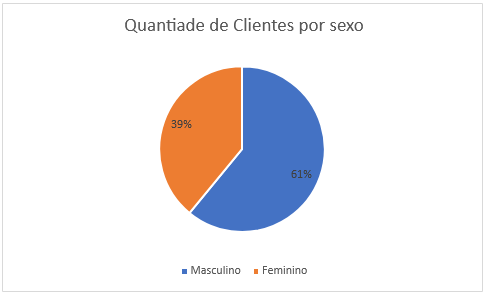

* A maioria dos clientes é do sexo masculino com 61%.

**Qual a escolaridade dos clientes?**

**Query:**

    SELECT 
    escolaridade,
    COUNT(escolaridade) AS 
        nivel_escolaridade,
    ROUND(COUNT(escolaridade)/2564.00, 2) AS
        porcentagem
    FROM credito
    GROUP BY escolaridade
    ORDER BY 3 DESC;
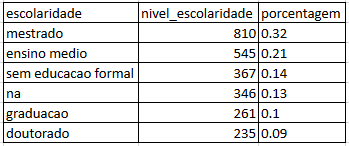

* 51% dos clientes possuem algum tipo de ensino superior.
* 14% dos clientes não possui educação formal.
* Existem valores nulos nos dados.

**Qual o salário anual dos clientes?**

**Query:**

     SELECT 
        "salario_anual",
        COUNT("salario_anual") AS 
            clientes,
        ROUND(COUNT("salario_anual")/2564.00, 2) AS
            porcentagem
    FROM credito
    GROUP BY "salario_anual"
    ORDER BY 3 DESC;
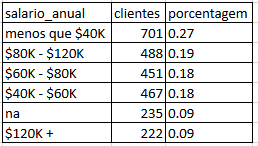

* 27% dos clientes ganham menos de 40k por ano.
* Apenas 9% dos clientes ganha mais de 120k por ano.
* Existem valores nulos nos salários.

**Qual a proporção dos clientes em relação ao tipo de cartão?**

**Query:**

    SELECT 
        tipo_cartao,
        COUNT(tipo_cartao) AS 
            clientes,
        ROUND(COUNT(tipo_cartao)/2564.00, 3) AS
            porcentagem
    FROM credito
    GROUP BY tipo_cartao
    ORDER BY 3 DESC;
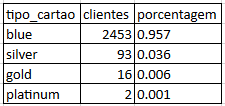

* 95% dos clientes possui cartão Blue.
* Menos de 2% dos clientes possui os cartões Gold e Platinum.

**Qual a distribuição dos limites dos clientes?**

**Query:**

    SELECT
        ROUND(MIN(limite_credito), 2) AS
        limite_minimo,
        ROUND(MAX(limite_credito), 2) AS
        limite_maximo,
        ROUND(AVG(limite_credito), 2) AS
        limite_medio,
        ROUND(STDDEV(limite_credito), 2) AS
        std_limite
    FROM credito;
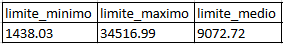 


* Existe uma diferença muito grande entre o limite mínimo e o limite máximo.
* O limite médio é de 9072,72.


## **Análise de dados:**
  
**Criando uma view sem dados nulos**

**Query:**

    CREATE VIEW credito_limpo AS
    SELECT *
    FROM credito
    WHERE 
      (escolaridade != 'na') AND
      (estado_civil != 'na') AND
      (salario_anual != 'na');

**Analisando os clientes com os maiores limites**

**Query:**

    SELECT 
      limite_credito, idade, sexo, 
      dependentes, escolaridade, 
      estado_civil, salario_anual, 
      tipo_cartao, qtd_produtos, 
      valor_transacoes_12m, 
      qtd_transacoes_12m
    FROM credito_limpo
    ORDER BY 1 DESC
    LIMIT 10;
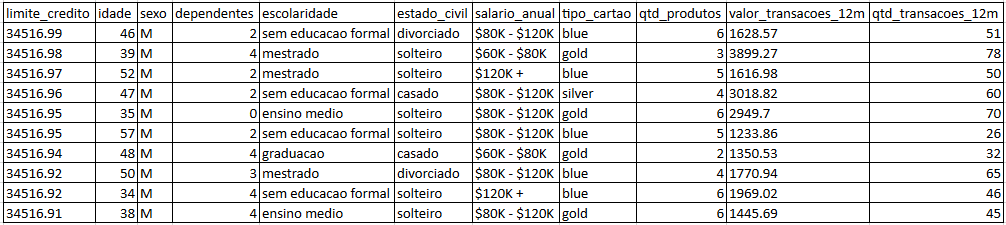

* Os maiores limites são de clientes do sexo masculino.
* Apenas 1 cliente não possui dependentes.
* A maioria dos clientes com os maiores limites ganha acima de 80k.

**Analisando os clientes com os menores limites**

**Query:**

    SELECT 
      limite_credito, idade, sexo, 
      dependentes, escolaridade, 
      estado_civil, salario_anual, 
      tipo_cartao, qtd_produtos, 
      valor_transacoes_12m, 
      qtd_transacoes_12m
    FROM credito_limpo
    ORDER BY 1 ASC
    LIMIT 10;
    
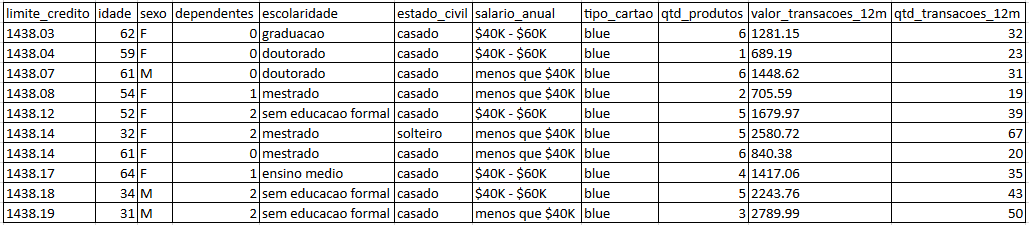

* A maioria dos clientes é casado.
* O sexo feminino predomina entre os menores limites.
* Todos os clientes possuem o cartão blue e ganham menos de 60k.

**Homens possuem limites maiores que as mulheres?**

**Query:**

    SELECT
      sexo,
      COUNT(limite_credito) AS qtd
    FROM credito_limpo
    WHERE limite_credito > 9072.72
    GROUP BY sexo
    ORDER BY 2 DESC;

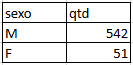  

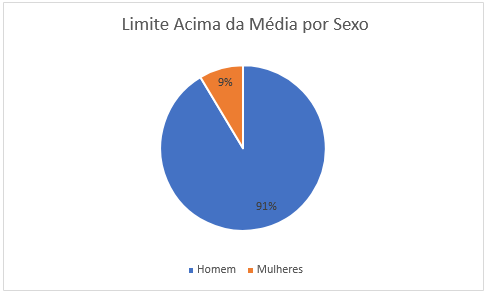

* Dos clientes com limite de crédito acima da média, 91% são do sexo masculino.

**Essa diferença também existe nos salários?**

**Query:**

    SELECT 
      sexo, 
      salario_anual, 
      COUNT(salario_anual) as total_clientes
    FROM credito_limpo
    GROUP BY 
      sexo, 
      salario_anual
    ORDER BY 2, 1;
    
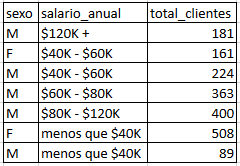

* Os homens possuem os maiores salários.
* As mulheres ganham menos de 60k por ano.

## **Conclusão:**

* Metade dos clientes possui algum tipo de ensino superior.
* Os cartões Gold e Platinum poderiam ser repensados pois representam apenas 2% dos clientes.
* Os homens possuem os maiores limtes de crédito e as mulheres os menores.
* As mulheres tem o salário anual menor que os homens.
* O  salário anual influencia no limite de crédito.
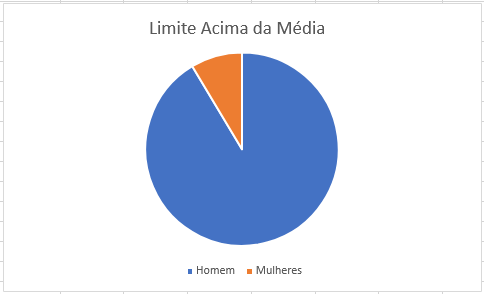